### 폰트 설치

In [47]:
!sudo apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following packages were automatically installed and are no longer required:
  ca-certificates-java cmake-data cuda-command-line-tools-11-3
  cuda-compiler-11-3 cuda-cudart-11-3 cuda-cudart-dev-11-3 cuda-cuobjdump-11-3
  cuda-cupti-11-3 cuda-cupti-dev-11-3 cuda-cuxxfilt-11-3
  cuda-documentation-11-3 cuda-driver-dev-11-3 cuda-gdb-11-3
  cuda-libraries-11-3 cuda-libraries-dev-11-3 cuda-memcheck-11-3
  cuda-nsight-11-3 cuda-nsight-compute-11-3 cuda-nsight-systems-11-3
  cuda-nvcc-11-3 cuda-nvdisasm-11-3 cuda-nvml-dev-11-3 cuda-nvprof-11-3
  cuda-nvprune-11-3 cuda-nvrtc-11-3 cuda-nvrtc-dev-11-3 cuda-nvtx-11-3
  cuda-nvvp-11-3 cuda-samples-11-3 cuda-sanitizer-11-3 cuda-thrust-11-3
  cuda-toolkit-11-3 cuda-toolkit-11-3-config-common
  cuda-toolkit-11-config-common cuda-toolkit-config-common cuda-tools-11-3
  cuda-visual-tools-11-3 default

In [1]:
import os
import copy
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#오류 문구 제거
import warnings
warnings.filterwarnings(action='ignore')

from os.path import join as pjoin

### 그래프 한글 깨짐 해결 코드

In [2]:
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
ROOT_PATH = os.path.abspath("..")

DATA = pjoin(ROOT_PATH, "data")
RAW_DATA = pjoin(DATA, "raw")
PROC_DATA = pjoin(DATA, "proc")

In [4]:
fish = pd.read_csv(pjoin(PROC_DATA, '수원시_연도별_어류(scaled).csv'), index_col=0)
fish.head()

,분류명,2015,2016,2017,2018,2019,2020
0,가물치,0.003650,0.002281,0.003527,0.003817,0.001040,0.005302
1,각시붕어,0.007299,0.005701,0.091711,0.020356,0.008316,0.014846
2,돌고기,0.001825,0.007982,0.019400,0.015267,0.004158,0.014846
3,떡붕어,0.008212,0.025086,0.007055,0.020356,0.002079,0.009544
4,메기,0.012774,0.003421,0.005291,0.002545,0.001040,0.006363


In [5]:
invert = pd.read_csv(pjoin(PROC_DATA, '수원시_연도별_저서무척추(scaled).csv'))
invert.head()

,Unnamed: 0,분류명,2015,2016,2017,2018,2019,2020
0,0,각다귀과,0.024931,0.013889,0.018504,0.014567,0.003204,0.004824
1,1,거머리과,0.028393,0.011806,0.007710,0.007283,0.000686,0.002814
2,2,깔따구과,0.040859,0.034028,0.050116,0.043700,0.131808,0.081407
3,3,꼬마하루살이과,0.119114,0.171528,0.080185,0.089585,0.073455,0.051457
4,4,나비날도래과,0.004848,0.000694,0.000771,0.002913,0.000229,0.000402


### 서로 다른 데이터 합치기

In [6]:
con = pd.concat([fish, invert], axis=0)
con

,분류명,2015,2016,2017,2018,2019,2020,Unnamed: 0
0,가물치,0.003650,0.002281,0.003527,0.003817,0.001040,0.005302,NaN
1,각시붕어,0.007299,0.005701,0.091711,0.020356,0.008316,0.014846,NaN
2,돌고기,0.001825,0.007982,0.019400,0.015267,0.004158,0.014846,NaN
3,떡붕어,0.008212,0.025086,0.007055,0.020356,0.002079,0.009544,NaN
4,메기,0.012774,0.003421,0.005291,0.002545,0.001040,0.006363,NaN
5,미꾸라지,0.005474,0.001140,0.001764,0.006361,0.003119,0.002121,NaN
6,미꾸리,0.003650,0.015964,0.021164,0.011450,0.014553,0.014846,NaN
7,밀어,0.124088,0.095781,0.149912,0.083969,0.037422,0.051962,NaN
8,배스,0.032847,0.051311,0.042328,0.054707,0.029106,0.068929,NaN
9,버들치,0.062956,0.060433,0.091711,0.073791,0.018711,0.037116,NaN


### 데이터 row, col 변경

In [7]:
fishT = fish.transpose()
invertT = invert.transpose()

In [8]:
fishT = fishT.reset_index()
invertT = invertT.reset_index()

In [9]:
invertT

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
1,분류명,각다귀과,거머리과,깔따구과,꼬마하루살이과,나비날도래과,넙적거머리과,네모집날도래과,논우렁이과,다슬기과,...,실잠자리과,실지렁이과,왕잠자리과,왼돌이물달팽이과,잠자리과,장구애비과,재첩과,줄날도래과,징거미새우과,플라나리아과
2,2015,0.0249307,0.0283934,0.0408587,0.119114,0.00484765,0.0180055,0.00761773,0.00831025,0.0311634,...,0.193213,0.00484765,0.00692521,0.129501,0.0526316,0.00761773,0.00415512,0.0304709,0.0117729,0.0110803
3,2016,0.0138889,0.0118056,0.0340278,0.171528,0.000694444,0.0201389,0.00833333,0.00347222,0.0270833,...,0.186806,0.00486111,0.00555556,0.0368056,0.0597222,0.0111111,0.0138889,0.0243056,0.025,0.0152778
4,2017,0.0185042,0.0077101,0.0501157,0.080185,0.00077101,0.0177332,0.00077101,0.0123362,0.0323824,...,0.151118,0.0123362,0.00385505,0.0478026,0.0454896,0.00693909,0.0200463,0.0370085,0.0531997,0.0169622
5,2018,0.0145666,0.00728332,0.0436999,0.0895849,0.00291333,0.0101966,0.00145666,0.00655499,0.0247633,...,0.154406,0.00436999,0.00801165,0.0480699,0.0436999,0.01311,0.0182083,0.0269483,0.0436999,0.01311
6,2019,0.00320366,0.000686499,0.131808,0.0734554,0.000228833,0.0144165,0.0020595,0.0020595,0.146682,...,0.0540046,0.0020595,0.001373,0.0791762,0.0141876,0.002746,0.0146453,0.20778,0.00892449,0.0125858
7,2020,0.00482412,0.00281407,0.081407,0.0514573,0.00040201,0.0188945,0.00582915,0.0080402,0.118593,...,0.0488442,0.00502513,0.00140704,0.041005,0.0156784,0.00281407,0.0301508,0.256884,0.0211055,0.0502513


In [10]:
fishT.set_axis(['년도'] + list(fishT.iloc[0])[1:], axis=1, inplace=True)
fishT = fishT.drop(fishT.index[0])
fishT

,년도,가물치,각시붕어,돌고기,떡붕어,메기,미꾸라지,미꾸리,밀어,배스,버들치,붕어,블루길,얼록동사리,잉어,참붕어,피라미
1,2015,0.00364964,0.00729927,0.00182482,0.00821168,0.0127737,0.00547445,0.00364964,0.124088,0.0328467,0.0629562,0.402372,0.000912409,0.0182482,0.0875912,0.126825,0.101277
2,2016,0.0022805,0.00570125,0.00798176,0.0250855,0.00342075,0.00114025,0.0159635,0.0957811,0.0513113,0.0604333,0.356899,0.0342075,0.0376283,0.063854,0.114025,0.124287
3,2017,0.00352734,0.0917108,0.0194004,0.00705467,0.00529101,0.00176367,0.021164,0.149912,0.042328,0.0917108,0.146384,0.0282187,0.0599647,0.0828924,0.0705467,0.178131
4,2018,0.00381679,0.0203562,0.0152672,0.0203562,0.00254453,0.00636132,0.0114504,0.0839695,0.0547074,0.0737913,0.296438,0.0139949,0.0496183,0.0788804,0.0547074,0.21374
5,2019,0.0010395,0.00831601,0.004158,0.002079,0.0010395,0.0031185,0.014553,0.037422,0.029106,0.018711,0.2079,0.00623701,0.037422,0.037422,0.149688,0.441788
6,2020,0.00530223,0.0148462,0.0148462,0.00954401,0.00636267,0.00212089,0.0148462,0.0519618,0.068929,0.0371156,0.1421,0.0254507,0.0551432,0.0530223,0.0530223,0.445387


In [11]:
invertT.set_axis(['년도'] + list(invertT.iloc[1])[1:], axis=1, inplace=True)
invertT = invertT.drop(invertT.index[:2])
invertT

,년도,각다귀과,거머리과,깔따구과,꼬마하루살이과,나비날도래과,넙적거머리과,네모집날도래과,논우렁이과,다슬기과,...,실잠자리과,실지렁이과,왕잠자리과,왼돌이물달팽이과,잠자리과,장구애비과,재첩과,줄날도래과,징거미새우과,플라나리아과
2,2015,0.0249307,0.0283934,0.0408587,0.119114,0.00484765,0.0180055,0.00761773,0.00831025,0.0311634,...,0.193213,0.00484765,0.00692521,0.129501,0.0526316,0.00761773,0.00415512,0.0304709,0.0117729,0.0110803
3,2016,0.0138889,0.0118056,0.0340278,0.171528,0.000694444,0.0201389,0.00833333,0.00347222,0.0270833,...,0.186806,0.00486111,0.00555556,0.0368056,0.0597222,0.0111111,0.0138889,0.0243056,0.025,0.0152778
4,2017,0.0185042,0.0077101,0.0501157,0.080185,0.00077101,0.0177332,0.00077101,0.0123362,0.0323824,...,0.151118,0.0123362,0.00385505,0.0478026,0.0454896,0.00693909,0.0200463,0.0370085,0.0531997,0.0169622
5,2018,0.0145666,0.00728332,0.0436999,0.0895849,0.00291333,0.0101966,0.00145666,0.00655499,0.0247633,...,0.154406,0.00436999,0.00801165,0.0480699,0.0436999,0.01311,0.0182083,0.0269483,0.0436999,0.01311
6,2019,0.00320366,0.000686499,0.131808,0.0734554,0.000228833,0.0144165,0.0020595,0.0020595,0.146682,...,0.0540046,0.0020595,0.001373,0.0791762,0.0141876,0.002746,0.0146453,0.20778,0.00892449,0.0125858
7,2020,0.00482412,0.00281407,0.081407,0.0514573,0.00040201,0.0188945,0.00582915,0.0080402,0.118593,...,0.0488442,0.00502513,0.00140704,0.041005,0.0156784,0.00281407,0.0301508,0.256884,0.0211055,0.0502513


In [12]:
total_df = pd.merge(fishT, invertT, on='년도')
total_df = total_df.reset_index(drop=True)

In [13]:
total_df

,년도,가물치,각시붕어,돌고기,떡붕어,메기,미꾸라지,미꾸리,밀어,배스,...,실잠자리과,실지렁이과,왕잠자리과,왼돌이물달팽이과,잠자리과,장구애비과,재첩과,줄날도래과,징거미새우과,플라나리아과
0,2015,0.00364964,0.00729927,0.00182482,0.00821168,0.0127737,0.00547445,0.00364964,0.124088,0.0328467,...,0.193213,0.00484765,0.00692521,0.129501,0.0526316,0.00761773,0.00415512,0.0304709,0.0117729,0.0110803
1,2016,0.0022805,0.00570125,0.00798176,0.0250855,0.00342075,0.00114025,0.0159635,0.0957811,0.0513113,...,0.186806,0.00486111,0.00555556,0.0368056,0.0597222,0.0111111,0.0138889,0.0243056,0.025,0.0152778
2,2017,0.00352734,0.0917108,0.0194004,0.00705467,0.00529101,0.00176367,0.021164,0.149912,0.042328,...,0.151118,0.0123362,0.00385505,0.0478026,0.0454896,0.00693909,0.0200463,0.0370085,0.0531997,0.0169622
3,2018,0.00381679,0.0203562,0.0152672,0.0203562,0.00254453,0.00636132,0.0114504,0.0839695,0.0547074,...,0.154406,0.00436999,0.00801165,0.0480699,0.0436999,0.01311,0.0182083,0.0269483,0.0436999,0.01311
4,2019,0.0010395,0.00831601,0.004158,0.002079,0.0010395,0.0031185,0.014553,0.037422,0.029106,...,0.0540046,0.0020595,0.001373,0.0791762,0.0141876,0.002746,0.0146453,0.20778,0.00892449,0.0125858
5,2020,0.00530223,0.0148462,0.0148462,0.00954401,0.00636267,0.00212089,0.0148462,0.0519618,0.068929,...,0.0488442,0.00502513,0.00140704,0.041005,0.0156784,0.00281407,0.0301508,0.256884,0.0211055,0.0502513


In [14]:
cols = total_df.columns.tolist()

In [15]:
scaled_total_df = copy.deepcopy(total_df)

In [16]:
for c in cols[1:]:
    scaled_total_df[c] = scaled_total_df[c] / scaled_total_df[c].sum()

In [17]:
scaled_total_df

,년도,가물치,각시붕어,돌고기,떡붕어,메기,미꾸라지,미꾸리,밀어,배스,...,실잠자리과,실지렁이과,왕잠자리과,왼돌이물달팽이과,잠자리과,장구애비과,재첩과,줄날도래과,징거미새우과,플라나리아과
0,2015,0.186054,0.0492429,0.0287471,0.113529,0.40639,0.274009,0.0447112,0.228466,0.117634,...,0.245073,0.144708,0.255284,0.338689,0.227439,0.17181,0.0411013,0.0522301,0.0719162,0.0929033
1,2016,0.116257,0.0384623,0.12574,0.346815,0.10883,0.0570722,0.195567,0.176349,0.183761,...,0.236945,0.14511,0.204794,0.0962587,0.25808,0.2506,0.137385,0.041662,0.152716,0.128097
2,2017,0.179819,0.618707,0.305622,0.097533,0.168331,0.0882757,0.259278,0.276013,0.151589,...,0.191679,0.368249,0.142109,0.12502,0.196576,0.156504,0.198292,0.0634361,0.324978,0.14222
3,2018,0.194576,0.137329,0.24051,0.281431,0.080953,0.318399,0.140277,0.154602,0.195923,...,0.19585,0.130449,0.295333,0.125719,0.188843,0.295683,0.180111,0.0461919,0.266947,0.109921
4,2019,0.0529925,0.0561022,0.0655027,0.0287428,0.0330712,0.156088,0.178287,0.0689002,0.104237,...,0.0684996,0.0614784,0.0506128,0.207072,0.0613097,0.0619333,0.144867,0.356155,0.0545165,0.105526
5,2020,0.270301,0.100157,0.233879,0.131949,0.202425,0.106156,0.181879,0.0956704,0.246855,...,0.0619542,0.150006,0.0518675,0.107242,0.0677518,0.0634686,0.298243,0.440324,0.128926,0.421333


## 상관관계 분석

In [18]:
len(scaled_total_df.columns), scaled_total_df.columns

(51,
 Index(['년도', '가물치', '각시붕어', '돌고기', '떡붕어', '메기', '미꾸라지', '미꾸리', '밀어', '배스',
        '버들치', '붕어', '블루길', '얼록동사리', '잉어', '참붕어', '피라미', '각다귀과', '거머리과', '깔따구과',
        '꼬마하루살이과', '나비날도래과', '넙적거머리과', '네모집날도래과', '논우렁이과', '다슬기과', '돌거머리과',
        '또아리물달팽이과', '모기과', '물달팽이과', '물땡땡이과', '물방개과', '물벌레과', '물잠자리과', '물장군과',
        '방울실잠자리과', '뾰족쨈물우렁이과', '사과우렁이과', '새뱅이과', '석패과', '소금쟁이과', '실잠자리과',
        '실지렁이과', '왕잠자리과', '왼돌이물달팽이과', '잠자리과', '장구애비과', '재첩과', '줄날도래과', '징거미새우과',
        '플라나리아과'],
       dtype='object'))

In [19]:
fish_names = fish['분류명'].tolist()
invert_names = invert['분류명'].tolist()

In [20]:
def print_correlation_between_fish_invert(data):
    for fish_c in fish_names:
        for invert_c in invert_names:
            coe, pval = spst.pearsonr(data[fish_c], data[invert_c])
            if abs(coe) >= 0.5 and pval <= 0.05:
                print(f'{fish_c} - {invert_c} : %.2f (pvalue %.3f)' % (coe, pval))

In [21]:
print_correlation_between_fish_invert(scaled_total_df)

각시붕어 - 사과우렁이과 : 0.92 (pvalue 0.010)
각시붕어 - 실지렁이과 : 0.94 (pvalue 0.005)
돌고기 - 사과우렁이과 : 0.83 (pvalue 0.043)
돌고기 - 징거미새우과 : 0.88 (pvalue 0.022)
떡붕어 - 물잠자리과 : 0.93 (pvalue 0.008)
떡붕어 - 방울실잠자리과 : 0.83 (pvalue 0.043)
떡붕어 - 장구애비과 : 0.84 (pvalue 0.037)
메기 - 거머리과 : 0.84 (pvalue 0.035)
미꾸라지 - 나비날도래과 : 0.81 (pvalue 0.049)
미꾸리 - 나비날도래과 : -0.86 (pvalue 0.027)
밀어 - 각다귀과 : 0.89 (pvalue 0.017)
밀어 - 다슬기과 : -0.81 (pvalue 0.049)
밀어 - 물장군과 : 0.91 (pvalue 0.012)
배스 - 물벌레과 : 0.83 (pvalue 0.040)
버들치 - 깔따구과 : -0.83 (pvalue 0.043)
버들치 - 다슬기과 : -0.89 (pvalue 0.017)
버들치 - 물방개과 : 0.82 (pvalue 0.046)
버들치 - 물장군과 : 0.96 (pvalue 0.002)
버들치 - 줄날도래과 : -0.82 (pvalue 0.045)
버들치 - 징거미새우과 : 0.83 (pvalue 0.043)
붕어 - 재첩과 : -0.82 (pvalue 0.044)
블루길 - 왼돌이물달팽이과 : -0.86 (pvalue 0.028)
얼록동사리 - 왼돌이물달팽이과 : -0.82 (pvalue 0.044)
얼록동사리 - 재첩과 : 0.88 (pvalue 0.022)
잉어 - 각다귀과 : 0.94 (pvalue 0.005)
잉어 - 깔따구과 : -0.85 (pvalue 0.031)
잉어 - 다슬기과 : -0.89 (pvalue 0.016)
잉어 - 물방개과 : 0.96 (pvalue 0.003)
잉어 - 물장군과 : 0.95 (pvalue 0.003)
잉어 - 실잠자리과 :

In [22]:
corr_table = scaled_total_df.drop(columns=['년도']).astype('float64').corr()
corr_table = corr_table.loc[invert_names, fish_names]
corr_table = corr_table.apply(lambda x: round(x ,2))
corr_table

,가물치,각시붕어,돌고기,떡붕어,메기,미꾸라지,미꾸리,밀어,배스,버들치,붕어,블루길,얼록동사리,잉어,참붕어,피라미
각다귀과,0.19,0.28,-0.08,0.19,0.68,0.36,-0.41,0.89,-0.30,0.77,0.60,-0.16,-0.39,0.94,0.00,-0.92
거머리과,0.13,-0.17,-0.49,0.12,0.84,0.39,-0.72,0.61,-0.35,0.38,0.79,-0.37,-0.74,0.70,0.28,-0.77
깔따구과,-0.40,-0.19,-0.23,-0.69,-0.43,-0.15,0.17,-0.75,-0.26,-0.83,-0.53,-0.33,0.07,-0.85,0.37,0.88
꼬마하루살이과,-0.37,-0.29,-0.41,0.68,0.11,-0.12,-0.19,0.35,-0.17,0.27,0.80,0.22,-0.53,0.29,0.40,-0.75
나비날도래과,0.24,-0.22,-0.37,0.09,0.70,0.81,-0.86,0.42,-0.27,0.36,0.72,-0.63,-0.63,0.72,0.08,-0.60
넙적거머리과,0.13,0.04,-0.14,-0.01,0.44,-0.73,0.16,0.26,0.11,-0.02,0.01,0.47,-0.13,-0.02,0.17,-0.17
네모집날도래과,0.12,-0.61,-0.55,0.36,0.53,-0.18,-0.46,0.00,0.16,-0.19,0.60,0.10,-0.60,0.03,0.29,-0.30
논우렁이과,0.68,0.77,0.61,-0.21,0.52,0.02,0.15,0.72,0.18,0.71,-0.32,0.18,0.41,0.69,-0.60,-0.30
다슬기과,-0.20,-0.28,-0.20,-0.62,-0.32,-0.25,0.15,-0.81,-0.03,-0.89,-0.56,-0.21,0.10,-0.89,0.26,0.95
돌거머리과,-0.79,0.21,-0.09,-0.46,-0.67,-0.29,0.50,-0.30,-0.55,-0.36,-0.41,-0.10,0.15,-0.58,0.48,0.43


## heatmap 분석

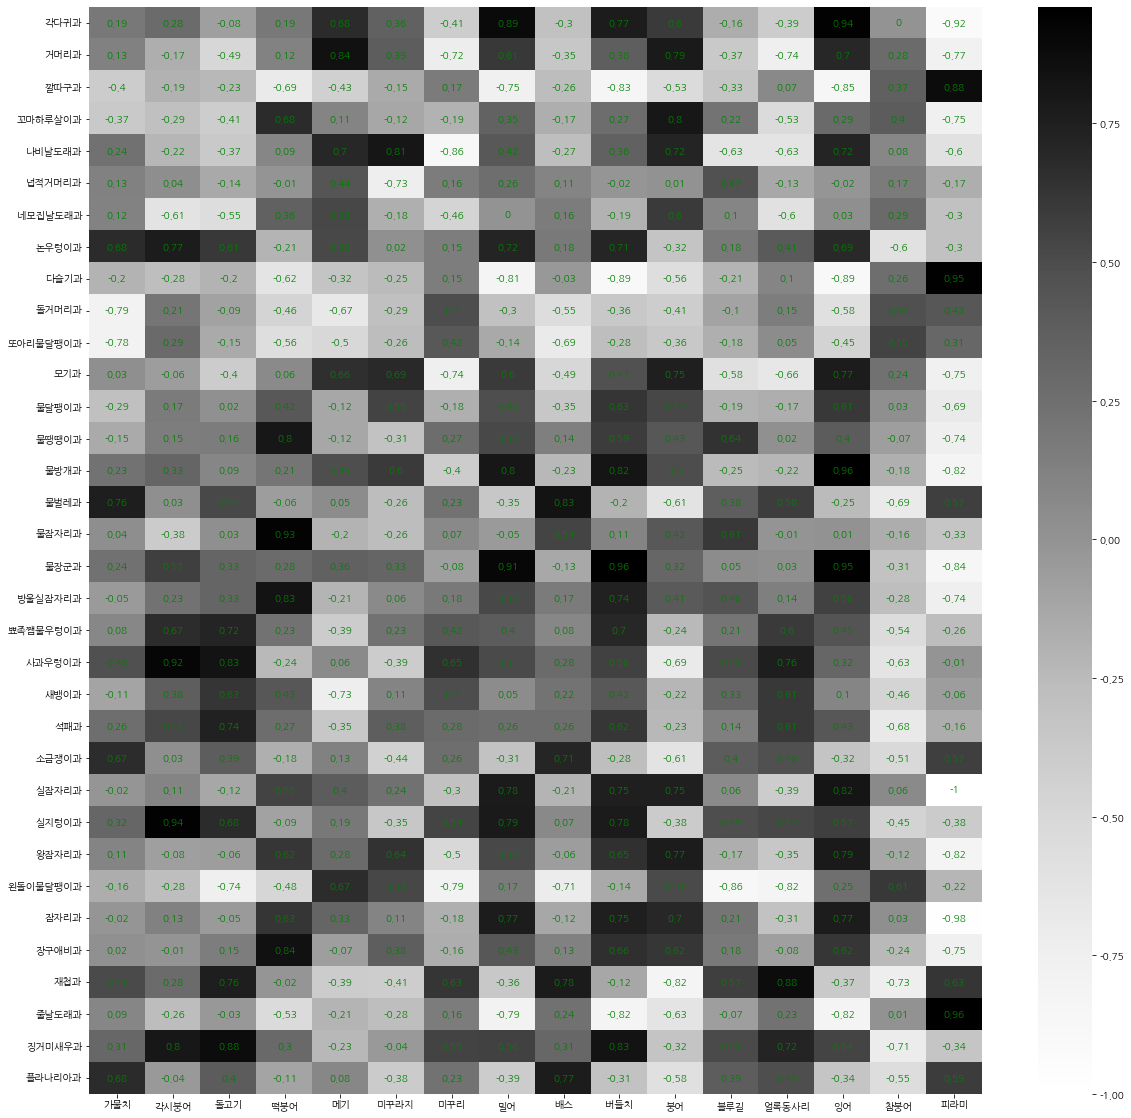

In [23]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr_table, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

## 상관관계 시각화

In [24]:
corr_unstacked = corr_table.unstack()

df = pd.DataFrame(corr_unstacked.sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
잉어,물방개과,0.960000
피라미,줄날도래과,0.960000
버들치,물장군과,0.960000
잉어,물장군과,0.950000
피라미,다슬기과,0.950000
각시붕어,실지렁이과,0.940000
잉어,각다귀과,0.940000
떡붕어,물잠자리과,0.930000
각시붕어,사과우렁이과,0.920000
밀어,물장군과,0.910000


In [28]:
df_high_corr = df[df['corr'] >= 0.8]

In [29]:
data = pd.DataFrame()

for fi, inv in df_high_corr.index:
    coe, pval = spst.pearsonr(scaled_total_df[fi], scaled_total_df['실잠자리과'])
    data = data.append({
        '어류' : fi,
        #'저서성 무척추생물' : inv,
        '상관계수' : coe,
        'pvalue' : pval
    }, ignore_index=True)
data

,pvalue,상관계수,어류
0,0.045682,0.820004,잉어
1,0.000029,-0.995572,피라미
2,0.089062,0.745277,버들치
3,0.045682,0.820004,잉어
4,0.000029,-0.995572,피라미
5,0.835762,0.109935,각시붕어
6,0.045682,0.820004,잉어
7,0.255174,0.552887,떡붕어
8,0.835762,0.109935,각시붕어
9,0.065690,0.782714,밀어


### p-val 0.05 이하 and 상관계수(coe) 0.5이상
- 0.045682	0.820004	잉어
- 0.000029	-0.995572	피라미

In [30]:
data = pd.DataFrame()

for fi, inv in df_high_corr.index:
    coe, pval = spst.pearsonr(scaled_total_df[fi], scaled_total_df['각다귀과'])
    data = data.append({
        '어류' : fi,
        #'저서성 무척추생물' : inv,
        '상관계수' : coe,
        'pvalue' : pval
    }, ignore_index=True)
data

,pvalue,상관계수,어류
0,0.005380,0.939500,잉어
1,0.010384,-0.915604,피라미
2,0.071328,0.773194,버들치
3,0.005380,0.939500,잉어
4,0.010384,-0.915604,피라미
5,0.595574,0.276677,각시붕어
6,0.005380,0.939500,잉어
7,0.714492,0.192725,떡붕어
8,0.595574,0.276677,각시붕어
9,0.017115,0.891192,밀어


### p-val 0.05 이하 and 상관계수(coe) 0.5이상
- 0.005380	0.939500	잉어
- 0.017115	0.891192	밀어
- 0.010384	-0.915604	피라미

## 데이터 시각화

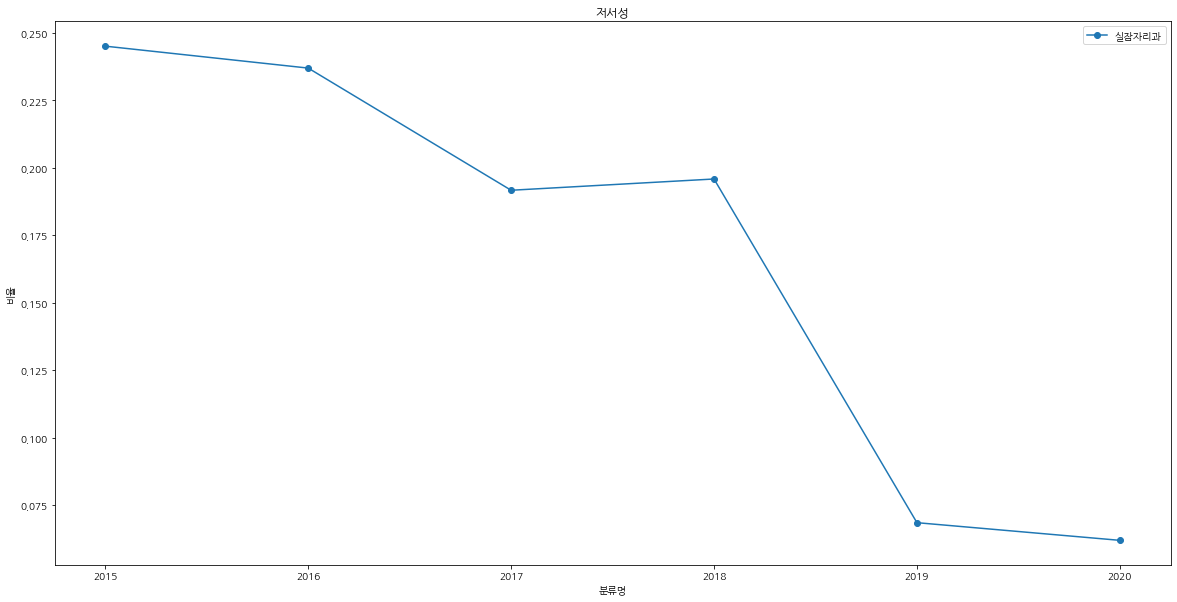

In [31]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '실잠자리과', 'o-', data = scaled_total_df, label = '실잠자리과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('저서성')
plt.legend()
plt.show()

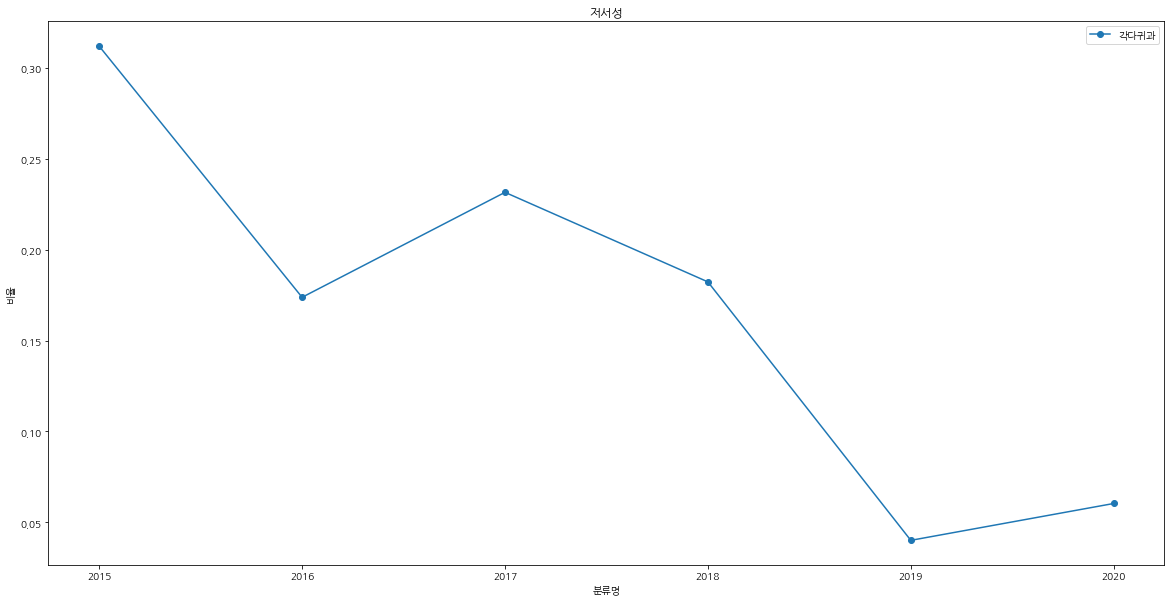

In [80]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '각다귀과', 'o-', data = scaled_total_df, label = '각다귀과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('저서성')
plt.legend()
plt.show()

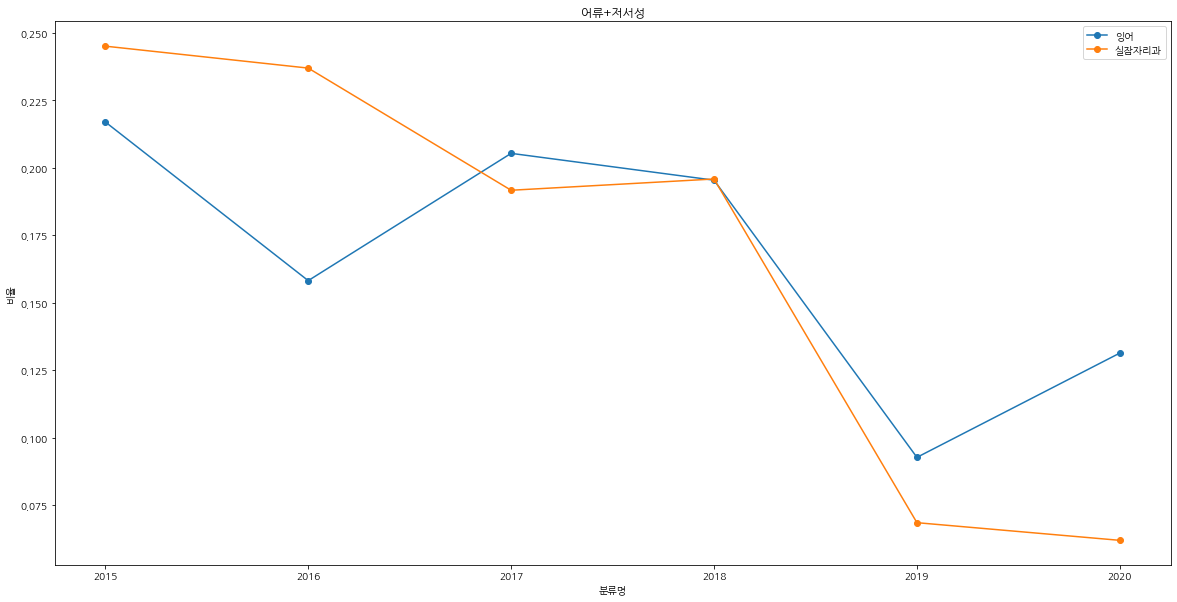

In [32]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '잉어', 'o-', data = scaled_total_df, label = '잉어')
plt.plot('년도', '실잠자리과', 'o-', data = scaled_total_df, label = '실잠자리과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('어류+저서성')
plt.legend()
plt.show()

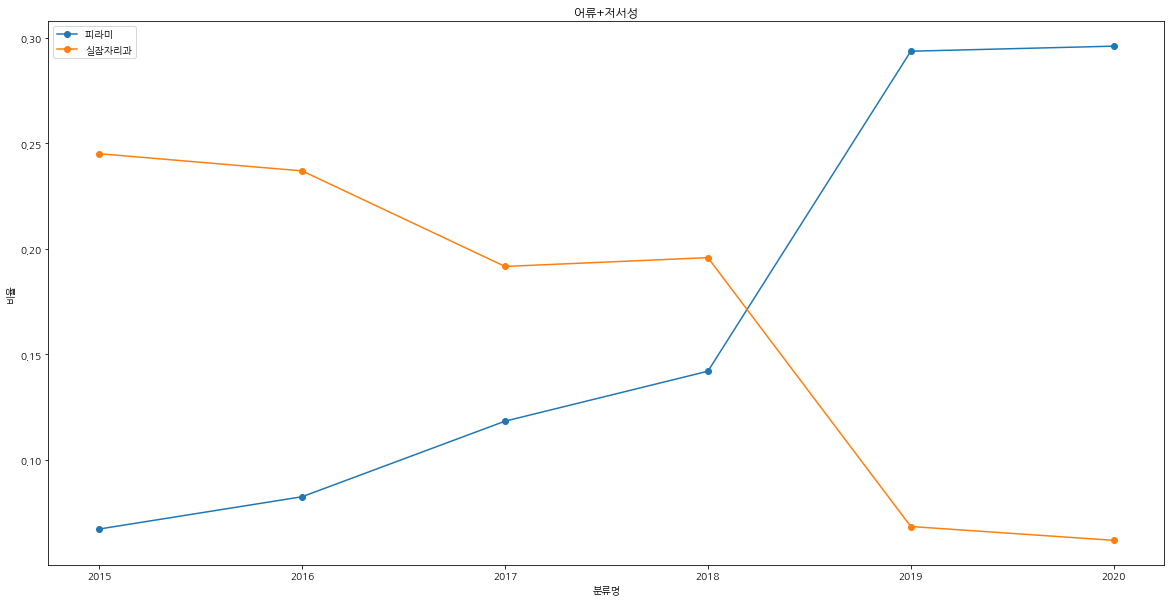

In [34]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '피라미', 'o-', data = scaled_total_df, label = '피라미 ')
plt.plot('년도', '실잠자리과', 'o-', data = scaled_total_df, label = '실잠자리과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('어류+저서성')
plt.legend()
plt.show()

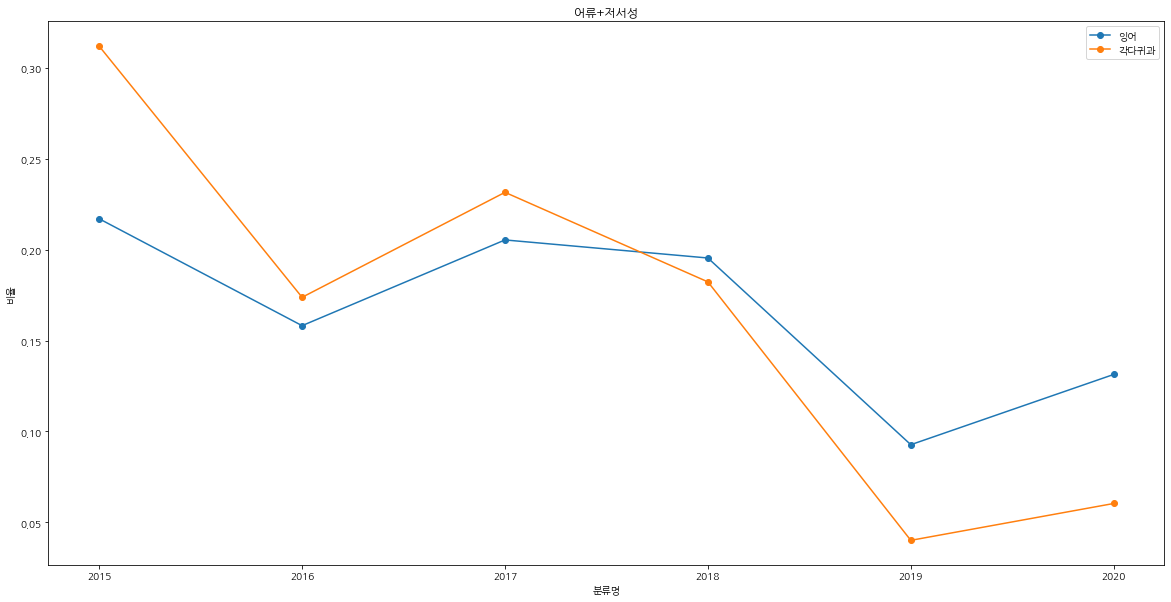

In [36]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '잉어', 'o-', data = scaled_total_df, label = '잉어')
plt.plot('년도', '각다귀과', 'o-', data = scaled_total_df, label = '각다귀과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('어류+저서성')
plt.legend()
plt.show()

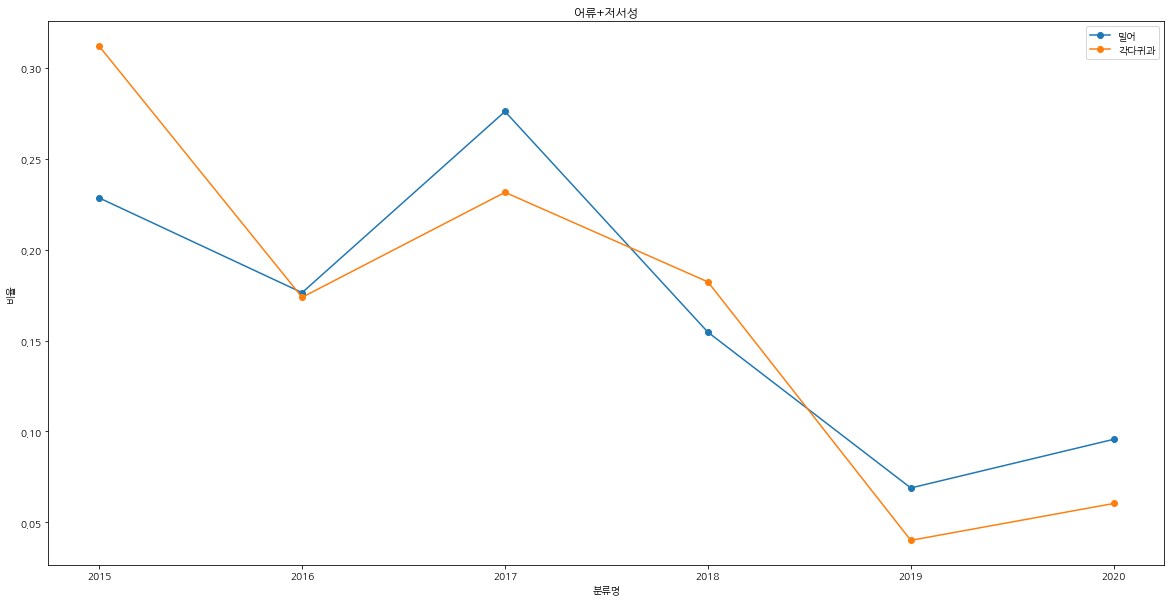

In [37]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '밀어', 'o-', data = scaled_total_df, label = '밀어')
plt.plot('년도', '각다귀과', 'o-', data = scaled_total_df, label = '각다귀과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('어류+저서성')
plt.legend()
plt.show()

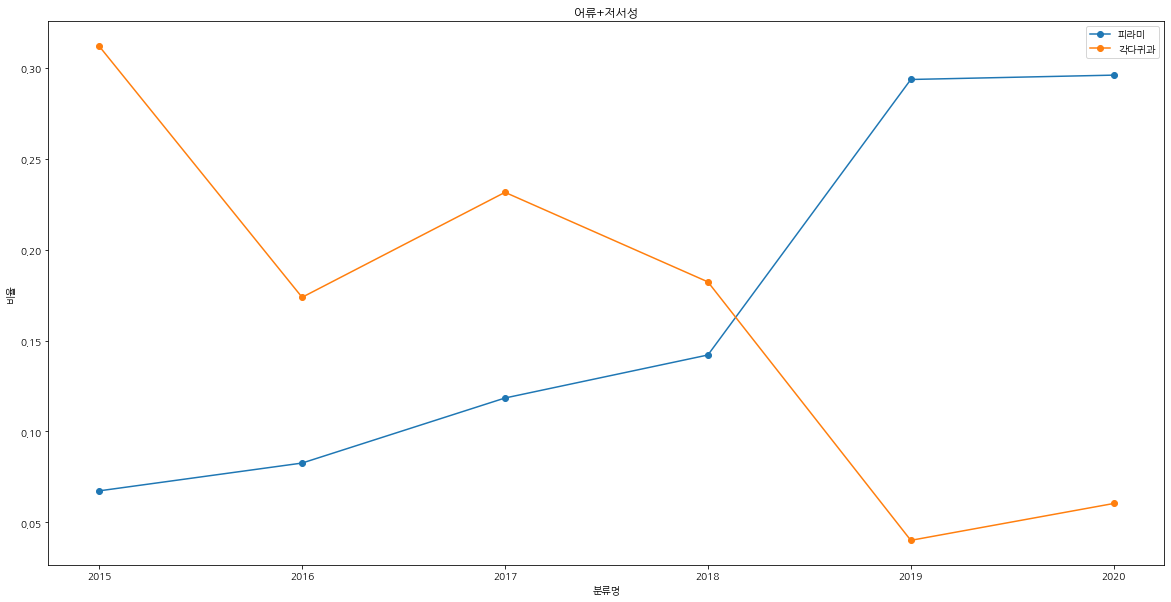

In [38]:
plt.figure(figsize=(20,10)) # 그래프 크기 조정 default size는 (6.4,4.4)
plt.plot('년도', '피라미', 'o-', data = scaled_total_df, label = '피라미')
plt.plot('년도', '각다귀과', 'o-', data = scaled_total_df, label = '각다귀과')
plt.xlabel('분류명')
plt.ylabel('비율')
plt.title('어류+저서성')
plt.legend()
plt.show()

In [39]:
for c in fish_names:
    coe, pval = spst.pearsonr(scaled_total_df[c], scaled_total_df['실잠자리과'])
    print(f'{c} - 실잠자리과: %.2f (pvalue %.3f)' % (coe, pval))

가물치 - 실잠자리과: -0.02 (pvalue 0.972)
각시붕어 - 실잠자리과: 0.11 (pvalue 0.836)
돌고기 - 실잠자리과: -0.12 (pvalue 0.827)
떡붕어 - 실잠자리과: 0.55 (pvalue 0.255)
메기 - 실잠자리과: 0.40 (pvalue 0.429)
미꾸라지 - 실잠자리과: 0.24 (pvalue 0.641)
미꾸리 - 실잠자리과: -0.30 (pvalue 0.563)
밀어 - 실잠자리과: 0.78 (pvalue 0.066)
배스 - 실잠자리과: -0.21 (pvalue 0.697)
버들치 - 실잠자리과: 0.75 (pvalue 0.089)
붕어 - 실잠자리과: 0.75 (pvalue 0.085)
블루길 - 실잠자리과: 0.06 (pvalue 0.913)
얼록동사리 - 실잠자리과: -0.39 (pvalue 0.442)
잉어 - 실잠자리과: 0.82 (pvalue 0.046)
참붕어 - 실잠자리과: 0.06 (pvalue 0.904)
피라미 - 실잠자리과: -1.00 (pvalue 0.000)
